In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import langid

In [2]:
def load_dataset(csv_file):
    """
    Load the dataset from a CSV file.

    Args:
    - csv_file (str): Path to the CSV file.

    Returns:
    - DataFrame: The loaded dataset.
    """
    return pd.read_csv(csv_file)

In [3]:
def split_train_dev_test(data, train_size=0.7, dev_size=0.15, random_state=42):
    """
    Split the dataset into train, dev, and test sets.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - train_size (float): The proportion of the training set.
    - dev_size (float): The proportion of the development set.
    - random_state (int): The random seed for reproducibility.

    Returns:
    - DataFrame, DataFrame, DataFrame: Train, dev, and test sets.
    """
    train_data, dev_test_data = train_test_split(data, train_size=train_size, random_state=random_state)
    dev_proportion = dev_size / (1.0 - train_size)
    dev_data, test_data = train_test_split(dev_test_data, train_size=dev_proportion, random_state=random_state)
    return train_data, dev_data, test_data

In [4]:
def plot_dataset_distribution(data, label_column="labels"):
    """
    Plot the distribution of labels in the dataset.

    Args:
    - data (DataFrame): The DataFrame containing the dataset.
    - label_column (str): The name of the column containing the labels.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data[label_column])
    plt.title("Dataset Distribution")
    plt.xlabel("Language")
    plt.ylabel("Frequency")
    plt.show()

In [5]:
def evaluate_model(train_data, dev_data, test_data, text_column="text", label_column="labels"):
    """
    Train and evaluate a language identification model.

    Args:
    - train_data (DataFrame): The training set.
    - dev_data (DataFrame): The development set.
    - test_data (DataFrame): The test set.
    - text_column (str): The name of the column containing the text.
    - label_column (str): The name of the column containing the labels.
    """
    langid.set_languages(train_data[label_column].unique())

    dev_predictions = dev_data[text_column].apply(lambda x: langid.classify(x)[0])
    test_predictions = test_data[text_column].apply(lambda x: langid.classify(x)[0])

    # Create directories if they don't exist
    os.makedirs("txt", exist_ok=True)
    os.makedirs("./results/IMAGES/dataset", exist_ok=True)

    # Save classification reports to text files
    with open("txt/dev_classification_report.txt", "w") as f:
        f.write("Evaluation Metrics for Development Set:\n")
        f.write(classification_report(dev_data[label_column], dev_predictions))

    with open("txt/test_classification_report.txt", "w") as f:
        f.write("Evaluation Metrics for Test Set:\n")
        f.write(classification_report(test_data[label_column], test_predictions))

    # Print classification reports
    print("Evaluation Metrics for Development Set:")
    print(classification_report(dev_data[label_column], dev_predictions))

    print("\nEvaluation Metrics for Test Set:")
    print(classification_report(test_data[label_column], test_predictions))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(test_data[label_column], test_predictions, normalize="true"),
                annot=True, fmt=".1f", xticklabels=test_data[label_column].unique(),
                yticklabels=test_data[label_column].unique(), cmap="Blues")
    plt.title("Confusion Matrix (Test Set)")
    plt.xlabel("Predicted Language")
    plt.ylabel("True Language")
    plt.savefig("./results/IMAGES/dataset/confusion_matrix.png", facecolor="white", bbox_inches="tight")
    plt.show()

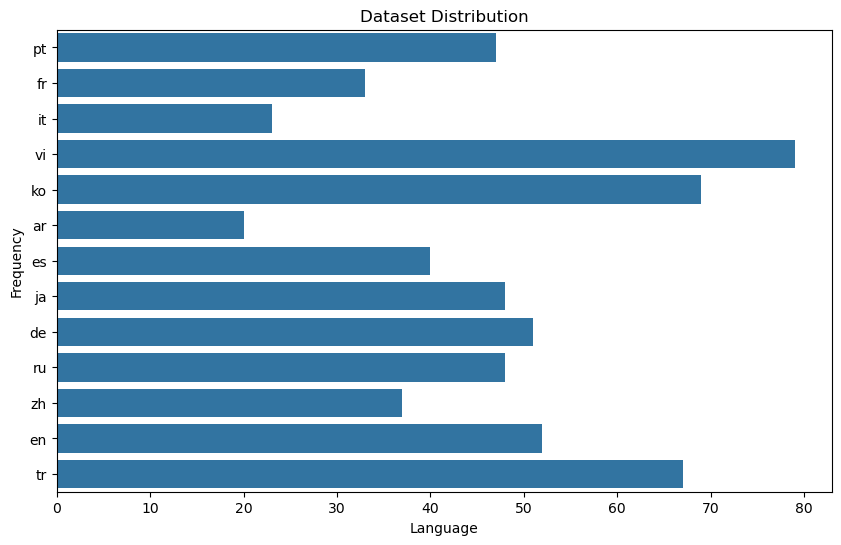

Evaluation Metrics for Development Set:
              precision    recall  f1-score   support

          ar       1.00      1.00      1.00         3
          de       0.88      1.00      0.93         7
          en       0.75      1.00      0.86         9
          es       0.86      0.86      0.86         7
          fr       1.00      1.00      1.00         3
          it       1.00      1.00      1.00         1
          ja       1.00      0.82      0.90        11
          ko       1.00      1.00      1.00        17
          pt       1.00      0.75      0.86         4
          ru       1.00      1.00      1.00         7
          tr       1.00      0.75      0.86        12
          vi       1.00      1.00      1.00         8
          zh       0.60      1.00      0.75         3

    accuracy                           0.92        92
   macro avg       0.93      0.94      0.92        92
weighted avg       0.94      0.92      0.93        92


Evaluation Metrics for Test Set:
     

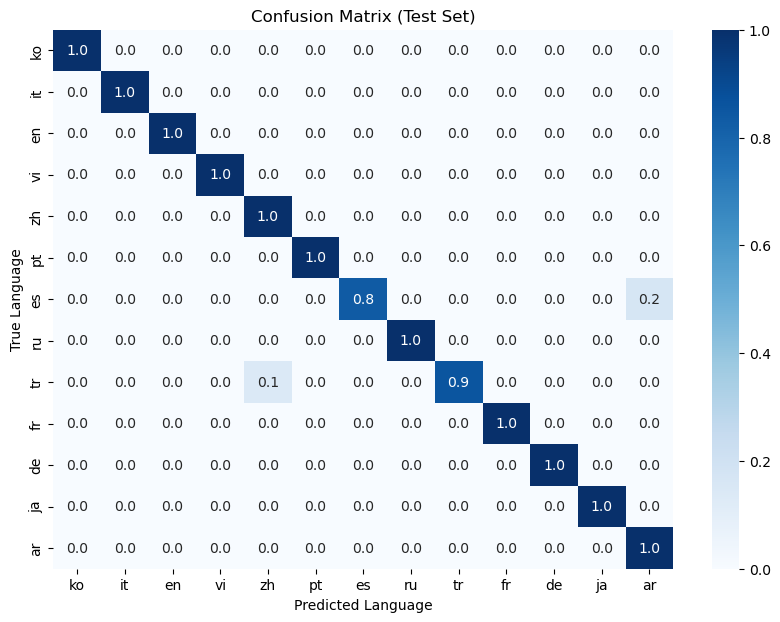

In [6]:
# Paths
csv_file = "../data/clean/results/CSV/result.csv"

# Load dataset
data = load_dataset(csv_file)

# Split dataset
train_data, dev_data, test_data = split_train_dev_test(data)

# Plot dataset distribution
plot_dataset_distribution(data)

# Evaluate model
evaluate_model(train_data, dev_data, test_data)